# Tutorial 1.1. Wind Speed Computation

### Description: The wind velocity is measured at a reference height and values are reported (generally) as the maxima  of given duration. In this tutorial the yearly maxima are analyzed to fit a distribution from the given data. The design wind velocity is computed for the chosen return period. Some exercises are proposed. This is based upon 2.3 from J. D. Holmes., Wind loading of structures“, 2nd ed. 

#### Students are advised to complete the exercises. 

Project: Structural Wind Engineering WS19-20 
        Chair of Structural Analysis @ TUM - R. Wüchner, M. Péntek
        
Author: kodakkal.anoop@tum.de, mate.pentek@tum.de

Created on:  30.11.2015

Last update: 27.09.2019

##### Contents:

 1. Extreme wind estimation based on given data
 2. Gumbel’s method
 3. Gringorten’s method
 4. The method of moments

In [1]:
# import
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive

#### Get the data files from 'east_sale.dat', data from [J. D. Holmes., Wind loading of structures“, 2nd ed. ](https://ebookcentral.proquest.com/lib/Munchentech/detail.action?docID=356271)

In [2]:
winddata = np.loadtxt('east_sale.dat')
year = winddata[:,0]
maxgust = winddata[:,1]

###### Let us evaluate the mean and standard deviation of the wind data. 

In [3]:
gust_m = np.mean(maxgust)
gust_std = np.std(maxgust)

###### Let us look at the plot

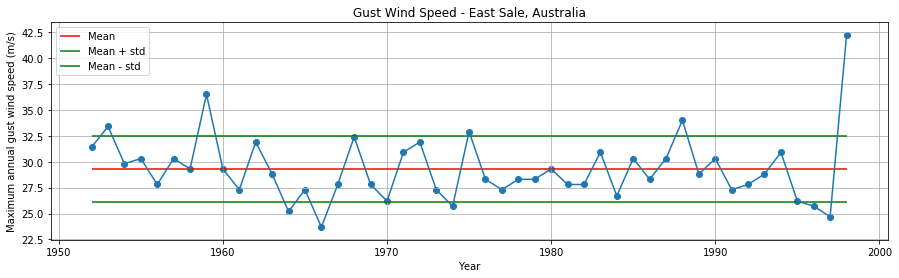

In [4]:
plt.figure(num=1, figsize=(15, 4))
plt.plot(year, maxgust)
plt.scatter(year, maxgust)
plt.hlines(gust_m, min(year), max(year), color='r', label = 'Mean')
plt.hlines(gust_m + gust_std, min(year), max(year), color='g', label = 'Mean + std')
plt.hlines(gust_m - gust_std, min(year), max(year), color='g', label = 'Mean - std')
plt.ylabel('Maximum annual gust wind speed (m/s)')
plt.xlabel('Year')
plt.title('Gust Wind Speed - East Sale, Australia')
plt.legend()
plt.grid(True)

To better understand the data, a histogram may be plotted. The histogram represents the frequency of data in each class interval. The inbuilt function for [plotting histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) in python is used.

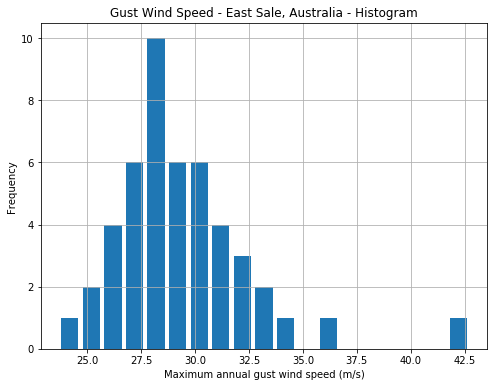

In [5]:
plt.figure(num=2, figsize=(8, 6))
plt.hist(maxgust, bins=np.arange(min(maxgust), max(maxgust)+1), rwidth=0.8)
plt.ylabel('Frequency')
plt.xlabel('Maximum annual gust wind speed (m/s)')
plt.title('Gust Wind Speed - East Sale, Australia - Histogram')
plt.grid(True)

### Extreme wind estimation based upon measured data

#### 3 methods are used in this tutorial for extreme wind estimation 
1. Gumbel’s method
2. Gringorten’s method
3. The method of moments

#### 1. Gumbel's method

A cumulative probability distribution function for extreme values of Type I (Gumbel) is considered 
$$F_u(U)=e^{-e^{-\frac{U-u}{a}}}$$

The following steps are followed to obtain the extreme wind statistics in Gumbel's method.

**step 1**  The largest wind speed in each calendar year of the record is extracted $U$ - 'maxgust'.

**step 2**  The series is ordered (ranked) $ 1,2,...m,...N $.

**step 3**  Each value is assigned a probability of non-exceedence $p ≈ m/(N + 1)$.

**step 4**  A reduced variate is formed $ y = −ln (−ln(p))$ .

**step 5**  A straight line is fit for the data reduced variate $ y $ and  gust wind speed $ U $.

**step 6**  The slope $a$ and mode $u$ of the best fit line is obtained. 

**step 7**  For a chosen return period an estimate for the maximum gust wind speed can be obtained as 
                $$ U_R = u + a \big\{ -ln\big[-ln\big(1-\frac{1}{R}\big)\big]\big\}$$

###### What does the return period indicate? 

**step 1**  The largest wind speed in each calendar year of the record is extracted ($U$) - 'maxgust' .

**step 2**  The series is ordered based on the absolute value of wind speed and ranked as $ rank = 1,2,...m,...N $, with $N$ being the maximum rank 

In [6]:
gust_sorted = np.sort(maxgust)
max_rank = len(gust_sorted) # the highest rank 
rank = np.arange(1, max_rank + 1) # the rank of ordered wind speed values. 

**step 3**  Each wind speed value is assigned a __probability of non-exceedance__ $p ≈ m/(N + 1)$. The probability of non-exceedance is the expected chance that the wind speed value will not exceed the speed considered. 

**step 4**  A reduced variate is formed $ y = −ln (−ln(p))$.

In [7]:
gumbel_prob_nonexc = rank / (max_rank + 1)
gumbel_red_var = -np.log(-np.log(gumbel_prob_nonexc))

**step 5**  A straight line is fit for the data reduced variate $ y $ and  gust wind speed $ U $.

Check out the [polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)  function

**step 6**  The slope $a$ and mode $u$ of the best fit line is obtained. 

In [8]:
[gumbel_slope, gumbel_mode] = np.polyfit(gumbel_red_var, gust_sorted, 1)

###### Let us look at the plot     

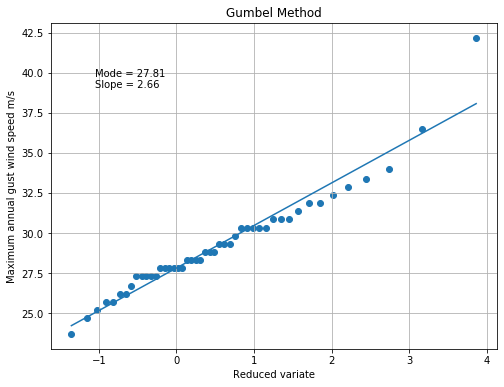

In [9]:
plt.figure(num=3, figsize=(8, 6))
plt.scatter(gumbel_red_var, gust_sorted)
x = np.linspace(min(gumbel_red_var), max(gumbel_red_var), 50)
plt.plot(x, gumbel_mode + gumbel_slope * x)
plt.text(0.1, 0.8,'Mode = ' + str(round(gumbel_mode,2)) +
         '\nSlope = ' + str(round(gumbel_slope,2)),
         transform=plt.gca().transAxes)
plt.ylabel('Maximum annual gust wind speed m/s')
plt.xlabel('Reduced variate')
plt.title('Gumbel Method')
plt.grid(True)

**step 7**  For a chosen return period an estimate for the maximum gust wind speed can be obtained as 
                $$ U_R = u + a \big\{ -ln\big[-ln\big(1-\frac{1}{R}\big)\big]\big\}$$

The [return period](https://en.wikipedia.org/wiki/Return_period) is the estimate of time in which the maximum annual gust wind speed will exceed the design wind speed. The return period is selected based on the design life of the structure. 
                

In [10]:
return_period = np.arange(10, 1000, 10)
gumbel_predicted_gustwind = gumbel_mode + gumbel_slope * (-np.log(-np.log(1-1/return_period)))


###### Let us look at the plot     

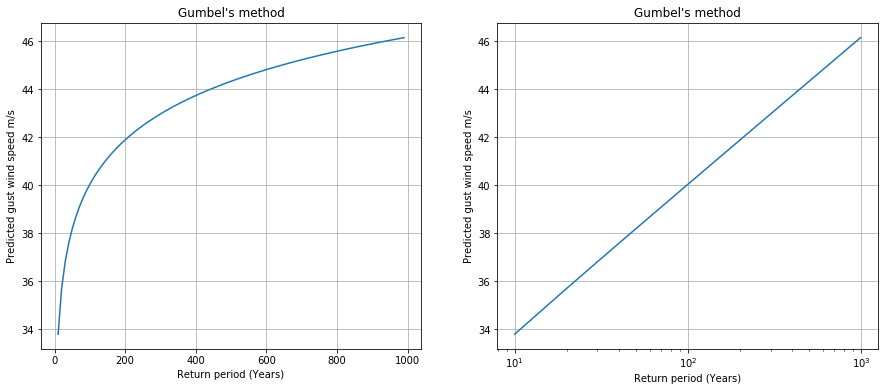

In [11]:
plt.figure(num=4, figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(return_period, gumbel_predicted_gustwind)
plt.ylabel('Predicted gust wind speed m/s')
plt.xlabel('Return period (Years)')
plt.title('Gumbel\'s method')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(return_period, gumbel_predicted_gustwind)
plt.xscale('log')
plt.ylabel('Predicted gust wind speed m/s')
plt.xlabel('Return period (Years)')
plt.title('Gumbel\'s method')
plt.grid(True)

#### 2. Gringorten’s method

The steps are similar to that of Gumbel's method, except that

**step 3**  Each value is assigned a probability of non-exceedence $p ≈ \frac{(m-0.44)}{(N + 0.12)}$.

In [12]:
gringorten_prob_nonexc = (rank - 0.44) /(max_rank + 0.12)
gringorten_red_var = -np.log(-np.log(gringorten_prob_nonexc))
[gringorten_slope, gringorten_mode] = np.polyfit(gringorten_red_var, gust_sorted,1)
gringorten_predicted_gustwind = gringorten_mode + gringorten_slope * (-np.log(-np.log(1-1/return_period)))


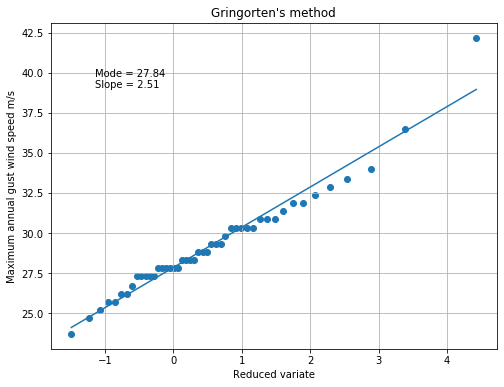

In [13]:
plt.figure(num=5, figsize=(8, 6))
plt.scatter(gringorten_red_var, gust_sorted)
x = np.linspace(min(gringorten_red_var), max(gringorten_red_var), 50)
plt.plot(x, gringorten_mode + gringorten_slope * x)
plt.text(0.1, 0.8,'Mode = ' + str(round(gringorten_mode,2)) +
         '\nSlope = ' + str(round(gringorten_slope,2)),
         transform=plt.gca().transAxes)
plt.ylabel('Maximum annual gust wind speed m/s')
plt.xlabel('Reduced variate')
plt.title('Gringorten\'s method')
plt.grid(True)

#### 3. The method of moments

The slope and mode is approximated as 

Slope $ a \approx \big( \frac{\sqrt{6}}{\pi}\big) \sigma$

Mode $ u \approx \mu - 0.5772 a$

In [14]:
moments_slope = np.sqrt(6)/np.pi * gust_std
moments_mode  = gust_m - 0.5772 * moments_slope
moments_predicted_gustwind = moments_mode + moments_slope * (-np.log(-np.log(1-1/return_period)))
# print the slope and mode values for method of moments : 
print('Mode - Method of moments  = ' + str(round(moments_mode,2)))
print('Slope - Method of moments  = ' + str(round(moments_slope,2)))

Mode - Method of moments  = 27.84
Slope - Method of moments  = 2.47


###### Let us look at the plot     

The gust wind speed prediction for the given return period is plotted here. All the three methods mentioned above are plotted in the same graph to compare. 

In [15]:
def plot_wind_prediction(n_years_return_period=50):   

    gumbel_predicted_gustwind_rp = gumbel_mode + gumbel_slope * (-np.log(-np.log(1-1/n_years_return_period)))
    gringorten_predicted_gustwind_rp = gringorten_mode + gringorten_slope * (-np.log(-np.log(1-1/n_years_return_period)))
    moments_predicted_gustwind_rp = moments_mode + moments_slope * (-np.log(-np.log(1-1/n_years_return_period)))
    

    fig = plt.figure(num=6, figsize=(15, 6))
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(return_period, gumbel_predicted_gustwind, label ='Gumbel\'s method')
    ax1.plot(return_period, gringorten_predicted_gustwind, label ='Gringorten\'s method')
    ax1.plot(return_period, moments_predicted_gustwind, label ='Method of moments')
    ax1.vlines(n_years_return_period, min(moments_predicted_gustwind), max(moments_predicted_gustwind),
               colors='k', linestyles='--', label = 'return period = ' + str(n_years_return_period))
    ax1.text(200,moments_predicted_gustwind_rp,'Predicted gust wind for' + str(n_years_return_period) + 
            'year return period (m/s)\n' + ' Gumbel Method =' + str(round(gumbel_predicted_gustwind_rp,2)) + 
            '\n Gringorten Method =' + str(round(gringorten_predicted_gustwind_rp,2)) +
            '\n Method of moments =' + str(round(moments_predicted_gustwind_rp,2)) )
    ax1.set_ylabel('Predicted gust wind speed m/s')
    ax1.set_xlabel('Return period (Years)')
    ax1.set_title('Gust wind speed prediction')
    ax1.legend()
    ax1.grid(True)

    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(return_period, gumbel_predicted_gustwind, label ='Gumbel\'s method')
    ax2.scatter(n_years_return_period, gumbel_predicted_gustwind_rp)
    ax2.plot(return_period, gringorten_predicted_gustwind, label ='Gringorten\'s method')
    ax2.scatter(n_years_return_period, gringorten_predicted_gustwind_rp)
    ax2.plot(return_period, moments_predicted_gustwind, label ='Method of moments')
    ax2.scatter(n_years_return_period, moments_predicted_gustwind_rp)
    ax2.set_xscale('log')
    ax2.set_ylabel('Predicted gust wind speed m/s')
    ax2.set_xlabel('Return period (years)')
    ax2.set_title('Gust wind speed prediction')
    ax2.legend()
    ax2.grid(True)
    plt.show()

###### Let us look at the plot     

The gust wind speed prediction for the given return period is plotted here. All the three methods mentioned above are plotted in the same graph to compare. 

In [16]:
return_period_plot=interactive(plot_wind_prediction,n_years_return_period = (0.1,1000.0))
return_period_plot

interactive(children=(FloatSlider(value=50.0, description='n_years_return_period', max=1000.0, min=0.1), Outpu…

Try different values of return periods using the slider provided and observe the changes 

### Exercise: Wind speed computation for Jeddah Airport 

For the given data (jeddah_airport.dat) of Jeddah Airport compute the predicted guest wind speed. 

What is the predicted gust wind speed for Jeddah Airport location for a return period of 50 years by Gumbel's method ? 

Replace the content of block 2 with the contents in block 17 to read in the new file content. (use 'Ctrl' + '/' to uncomment multiple lines)

In [17]:
# winddata = np.loadtxt('jeddah_airport.dat')
# year = winddata[:,0]
# maxgust = winddata[:,2]

## Check Point: Discussion

#### Discuss amoung groups the observations regading the various methods for wind speed computation.